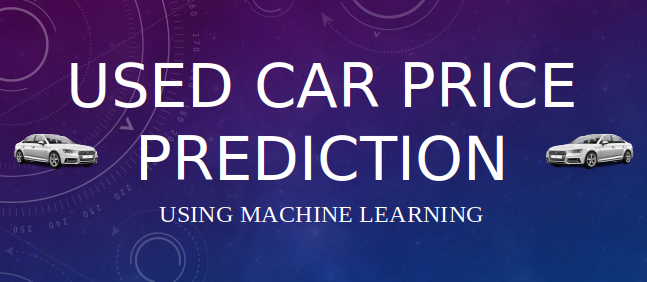

## **Import Libraries**

In [187]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

## **Load Dataset**

In [188]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [189]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ENERGY/Sport car price.csv')

## **Data Preprocessing 1**

In [190]:
df

,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
0,Porsche,911,2022,3,379,331,4,"101,200"
1,Lamborghini,Huracan,2021,5.2,630,443,2.8,"274,390"
2,Ferrari,488 GTB,2022,3.9,661,561,3,"333,750"
3,Audi,R8,2022,5.2,562,406,3.2,"142,700"
4,McLaren,720S,2021,4,710,568,2.7,"298,000"
...,...,...,...,...,...,...,...,...
1002,Koenigsegg,Jesko,2022,5,1280,1106,2.5,"3,000,000"
1003,Lotus,Evija,2021,Electric Motor,1972,1254,2,"2,000,000"
1004,McLaren,Senna,2021,4,789,590,2.7,"1,000,000"
1005,Pagani,Huayra,2021,6,764,738,3,"2,600,000"


In [191]:
df.select_dtypes(include='object').nunique()

Car Make                    38
Car Model                  176
Engine Size (L)             45
Horsepower                 124
Torque (lb-ft)              93
0-60 MPH Time (seconds)     43
Price (in USD)             367
dtype: int64

In [192]:
df.isnull().sum()

Car Make                    0
Car Model                   0
Year                        0
Engine Size (L)            10
Horsepower                  0
Torque (lb-ft)              3
0-60 MPH Time (seconds)     0
Price (in USD)              0
dtype: int64

**Remove Comma from `Price (in USD)` Columns**

In [193]:
# remove commas from the Price column
df['Price (in USD)'] = df['Price (in USD)'].str.replace(',', '')

# convert the Price column to integer
df['Price (in USD)'] = df['Price (in USD)'].astype(int)
df['Price (in USD)'].dtypes

dtype('int64')

In [194]:
df.head()

,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
0,Porsche,911,2022,3,379,331,4,101200
1,Lamborghini,Huracan,2021,5.2,630,443,2.8,274390
2,Ferrari,488 GTB,2022,3.9,661,561,3,333750
3,Audi,R8,2022,5.2,562,406,3.2,142700
4,McLaren,720S,2021,4,710,568,2.7,298000


In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Car Make                 1007 non-null   object
 1   Car Model                1007 non-null   object
 2   Year                     1007 non-null   int64 
 3   Engine Size (L)          997 non-null    object
 4   Horsepower               1007 non-null   object
 5   Torque (lb-ft)           1004 non-null   object
 6   0-60 MPH Time (seconds)  1007 non-null   object
 7   Price (in USD)           1007 non-null   int64 
dtypes: int64(2), object(6)
memory usage: 63.1+ KB


**Change numerical into integer**

In [196]:
# remove commas from 0-60 MPH Time (seconds) column
df['0-60 MPH Time (seconds)'] = df['0-60 MPH Time (seconds)'].str.replace(',', '')

# check if the Horsepower column contains string values
if df['Horsepower'].dtype == 'object':
    # remove strings from the Column A column
    df['Horsepower'] = df['Horsepower'].str.replace('[^0-9]+', '', regex=True)

    # convert the remaining values to integers and fill empty strings with 0
    df['Horsepower'] = df['Horsepower'].apply(lambda x: int(x) if x != '' else 0)
else:
    # do something else if the Column A column does not contain string values
    pass

# check if the Horsepower column contains string values
if df['Torque (lb-ft)'].dtype == 'object':
    # remove strings from the Column A column
    df['Torque (lb-ft)'] = df['Torque (lb-ft)'].str.replace('[^0-9]+', '', regex=True)

    # convert the remaining values to integers and fill empty strings with 0
    df['Torque (lb-ft)'] = df['Torque (lb-ft)'].fillna(0)
    df['Torque (lb-ft)'] = df['Torque (lb-ft)'].apply(lambda x: int(x) if x != '' else 0)
else:
    # do something else if the Column A column does not contain string values
    pass

# check if the Horsepower column contains string values
if df['0-60 MPH Time (seconds)'].dtype == 'object':
    # remove strings from the Column A column
    df['0-60 MPH Time (seconds)'] = df['0-60 MPH Time (seconds)'].str.replace('[^0-9]+', '', regex=True)

    # convert the remaining values to integers and fill empty strings with 0
    df['0-60 MPH Time (seconds)'] = df['0-60 MPH Time (seconds)'].apply(lambda x: int(x) if x != '' else 0)
else:
    # do something else if the Column A column does not contain string values
    pass

# Change numerical data into integer
df['Horsepower'] = df['Horsepower'].astype(int)
df['Torque (lb-ft)'] = df['Torque (lb-ft)'].astype(int)
df['0-60 MPH Time (seconds)'] = df['0-60 MPH Time (seconds)'].astype(float)

df.dtypes

Car Make                    object
Car Model                   object
Year                         int64
Engine Size (L)             object
Horsepower                   int64
Torque (lb-ft)               int64
0-60 MPH Time (seconds)    float64
Price (in USD)               int64
dtype: object

**Change Engine Size into Integer**

In [197]:
df['Engine Size (L)'].unique()

array(['3', '5.2', '3.9', '4', '4.4', '6.2', '3.8', '8', '5', '3.5',
       '4.7', '2', '2.9', '6', 'Electric', '6.5', '3.7', 'Electric Motor',
       '2.5', '1.5 + Electric', '6.8', '8.4', nan, '6.6', '7', '1.7',
       '3.3', '-', '6.7', '1.8', 'Electric (tri-motor)', '5.5',
       'Electric (93 kWh)', 'Electric (100 kWh)', 'Hybrid (4.0)', '4.6',
       '3.6', '1.5', 'Hybrid', '5.7', '2.0 (Electric)', '4.0 (Hybrid)',
       '0', '6.4', '6.3', '2.3'], dtype=object)

In [198]:
def capacity_engine_size(engine_size):
    if engine_size in ['Electric', 'Hybrid']:
        return 'Electric/Hybrid'
    elif engine_size in ['Electric Motor', 'Electric (tri-motor)', 'Electric (93 kWh)', 'Electric (100 kWh)', '2.0 (Electric)']:
        return 'Electric'
    elif engine_size == '1.5 + Electric':
        return '1.5 Hybrid'
    elif engine_size in ['Hybrid (4.0)', '4.0 (Hybrid)']:
        return '4.0 Hybrid'
    elif engine_size == '0':
        return 'Unknown'
    elif engine_size == '-':
        return 'Unknown'
    elif float(engine_size) < 2:
        return 'Small'
    elif float(engine_size) < 3:
        return 'Medium'
    else:
        return 'Large'
df['Engine Size (L)'] = df['Engine Size (L)'].apply(capacity_engine_size)

In [199]:
df['Engine Size (L)'].unique()

array(['Large', 'Medium', 'Electric/Hybrid', 'Electric', '1.5 Hybrid',
       'Small', 'Unknown', '4.0 Hybrid'], dtype=object)

**Removing car model**

It has much more unique values

In [200]:
df['Car Model'].unique()

array(['911', 'Huracan', '488 GTB', 'R8', '720S', 'M8', 'AMG GT',
       'Corvette', 'Mustang Shelby GT500', 'GT-R Nismo', 'DB11', 'Chiron',
       'Challenger SRT Hellcat', 'F-Type', 'Jesko', 'LC 500', 'Evora GT',
       'GranTurismo', 'Boxster', 'Giulia Quadrifoglio', 'Atom',
       'Continental GT', 'Artura', 'SLS AMG', 'Huayra', '1', 'Nevera',
       'Cayman GT4', 'Aventador SVJ', 'SF90 Stradale', 'RS7', 'M4',
       'Camaro ZL1', 'GT', '370Z Nismo', 'Taycan 4S', 'Urus', 'Roma',
       'RS3', 'i8', 'CLS63 AMG', 'Cayman', '570S', 'AMG C63', 'Camaro SS',
       'Mustang GT', 'Vantage', 'Panamera', 'S5', '600LT', 'M5', 'RS5',
       'M2', 'Challenger SRT Hellcat Redeye', 'Aventador', 'C63 AMG',
       '370Z', 'TT RS', 'Corvette Stingray', 'F8 Tributo',
       'Mustang Mach 1', '718 Cayman', 'NSX', 'MX-5 Miata',
       '718 Cayman GT4', 'Wraith', 'Roadster', 'Supra',
       'Fenyr Supersport', 'SL 63 AMG', 'DBS Superleggera',
       'Panamera Turbo S E-Hybrid', 'Portofino', 'Panamera T

In [201]:
df = df.drop('Car Model', axis=1)
df.head()

,Car Make,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
0,Porsche,2022,Large,379,331,4.0,101200
1,Lamborghini,2021,Large,630,443,28.0,274390
2,Ferrari,2022,Large,661,561,3.0,333750
3,Audi,2022,Large,562,406,32.0,142700
4,McLaren,2021,Large,710,568,27.0,298000


**Categorize Car Make**

In [202]:
df['Car Make'].unique()

array(['Porsche', 'Lamborghini', 'Ferrari', 'Audi', 'McLaren', 'BMW',
       'Mercedes-Benz', 'Chevrolet', 'Ford', 'Nissan', 'Aston Martin',
       'Bugatti', 'Dodge', 'Jaguar', 'Koenigsegg', 'Lexus', 'Lotus',
       'Maserati', 'Alfa Romeo', 'Ariel', 'Bentley', 'Mercedes-AMG',
       'Pagani', 'Polestar', 'Rimac', 'Acura', 'Mazda', 'Rolls-Royce',
       'Tesla', 'Toyota', 'W Motors', 'Shelby', 'TVR', 'Subaru',
       'Pininfarina', 'Kia', 'Alpine', 'Ultima'], dtype=object)

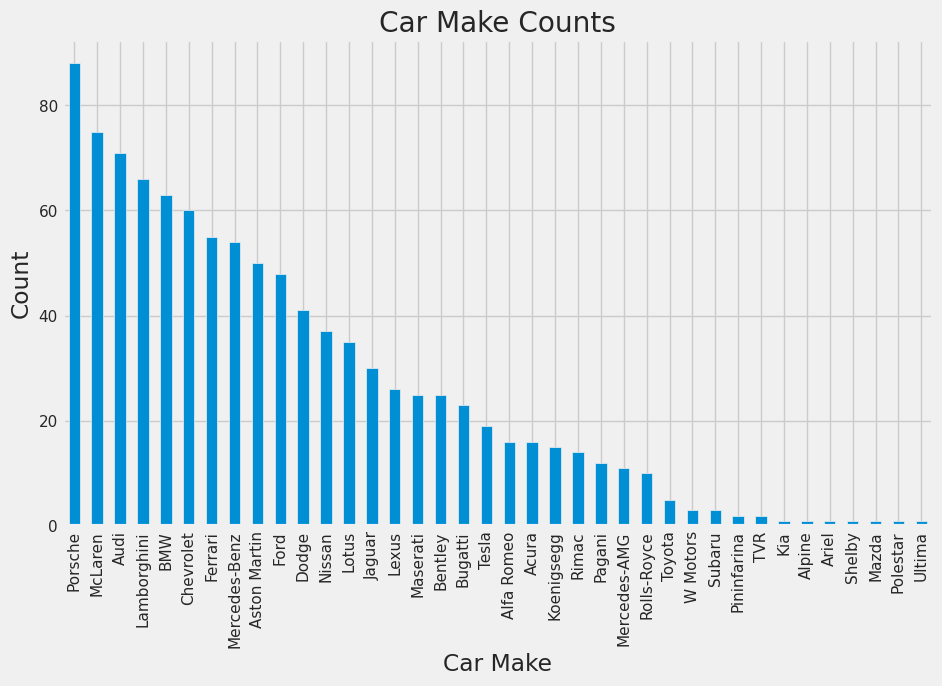

In [203]:
# Assuming 'df' is your DataFrame with the 'Car Make' column
car_make_counts = df['Car Make'].value_counts()

# Plotting the bar plot
plt.figure(figsize=(10, 6))
car_make_counts.plot(kind='bar')
plt.title('Car Make Counts')
plt.xlabel('Car Make')
plt.ylabel('Count')
plt.show()

In [204]:
car_make_prices = df[['Car Make', 'Price (in USD)']].sort_values('Price (in USD)', ascending=False)
car_make_prices

,Car Make,Price (in USD)
823,Bugatti,5200000
541,Bugatti,5200000
983,Bugatti,3900000
438,Lamborghini,3600000
624,Bugatti,3599000
...,...,...
92,Mazda,26830
924,Chevrolet,25000
997,Chevrolet,25000
886,Chevrolet,25000


In [205]:
#car_make_prices.to_csv('car_make_prices.csv', header=True, index=False)
#files.download('car_make_prices.csv')

In [206]:
# define a function to segment the values
def segment_car_make(value):
    if value in ['Bugatti', 'Koenigsegg', 'Pagani', 'Rimac']:
        return 'Hypercar'
    elif value in ['Lamborghini', 'Ferrari', 'McLaren', 'W Motors', 'Shelby', 'Ultima']:
        return 'Supercar'
    elif value in ['Porsche', 'Audi', 'BMW', 'Lotus', 'Ariel', 'TVR', 'Alpine']:
        return 'Sportcar'
    elif value in ['Mercedes-Benz', 'Aston Martin', 'Jaguar', 'Lexus', 'Maserati', 'Alfa Romeo', 'Bentley', 'Mercedes-AMG', 'Polestar', 'Acura', 'Rolls-Royce', 'Pininfarina']:
        return 'Luxury'
    elif value in ['Chevrolet', 'Ford', 'Nissan', 'Dodge', 'Mazda', 'Tesla', 'Toyota', 'Subaru', 'Kia']:
        return 'Mainstream'
    else:
        return 'Other'

# apply the function to the Car Make column
df['Car Make'] = df['Car Make'].apply(segment_car_make)

<Axes: >

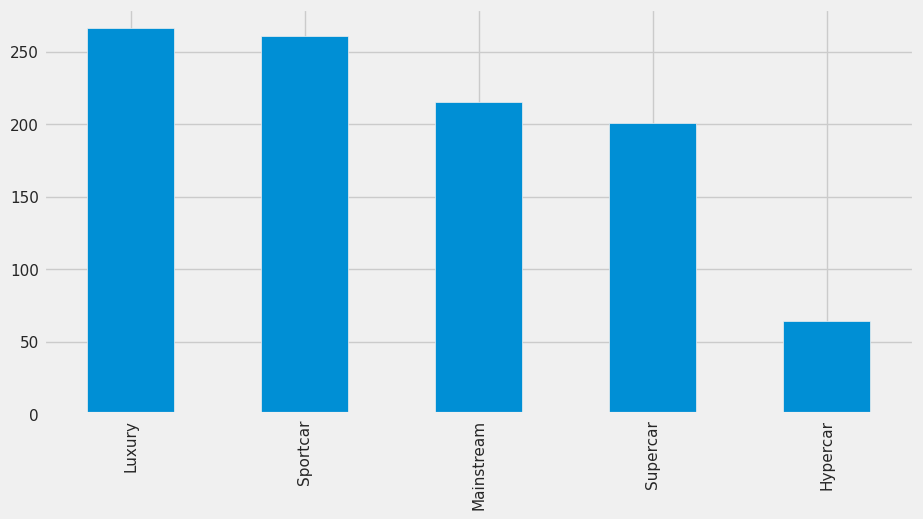

In [207]:
plt.figure(figsize=(10,5))
df['Car Make'].value_counts().plot(kind='bar')

In [208]:
df.head()

,Car Make,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
0,Sportcar,2022,Large,379,331,4.0,101200
1,Supercar,2021,Large,630,443,28.0,274390
2,Supercar,2022,Large,661,561,3.0,333750
3,Sportcar,2022,Large,562,406,32.0,142700
4,Supercar,2021,Large,710,568,27.0,298000


## **EDA (Exploratory Data Analysis)**

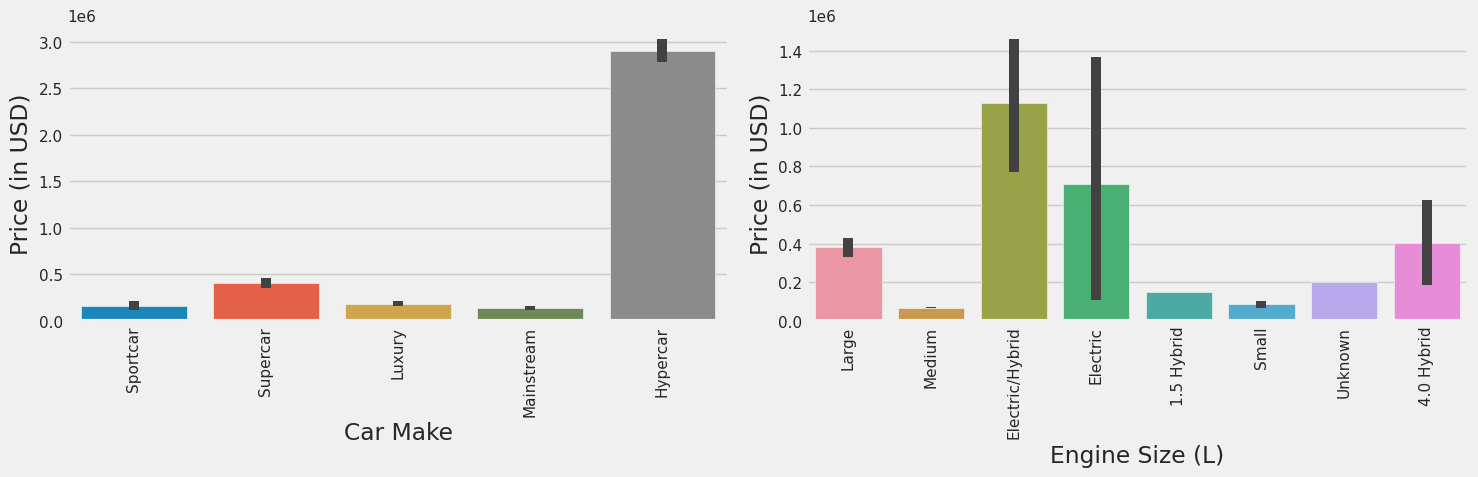

In [209]:
# list of categorical variables to plot
cat_vars = ['Car Make', 'Engine Size (L)']

# create figure with subplots
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
axs = axs.flatten()

# create barplot for each categorical variable
for i, var in enumerate(cat_vars):
    sns.barplot(x=var, y='Price (in USD)', data=df, ax=axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)

# adjust spacing between subplots
fig.tight_layout()

# show plot
plt.show()

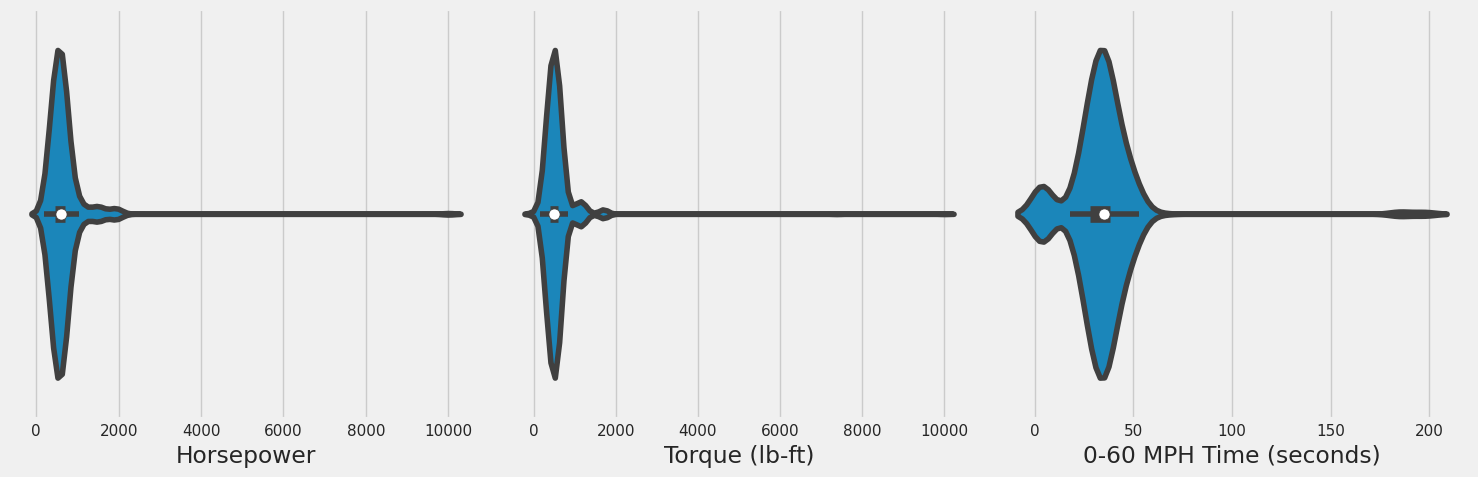

In [210]:
num_vars = ['Horsepower', 'Torque (lb-ft)', '0-60 MPH Time (seconds)']

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.violinplot(x=var, data=df, ax=axs[i])

fig.tight_layout()

plt.show()

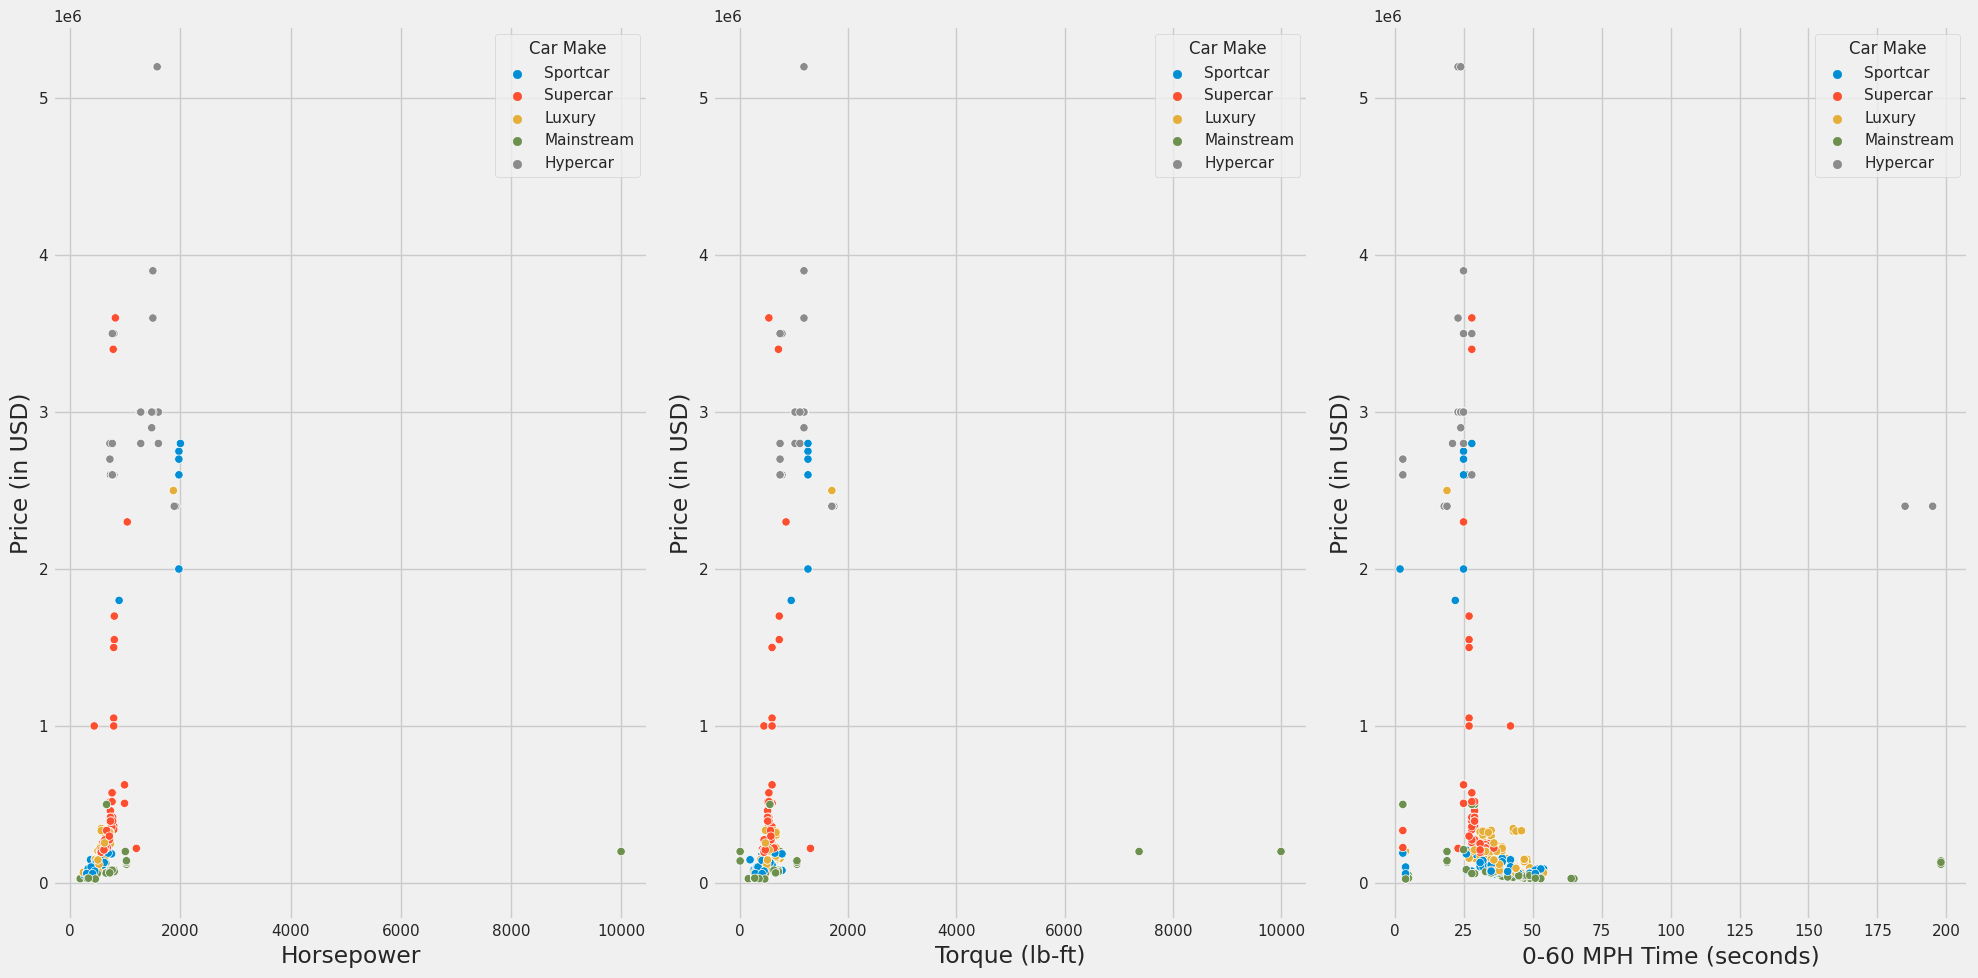

In [211]:
num_vars = ['Horsepower', 'Torque (lb-ft)', '0-60 MPH Time (seconds)']

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 10))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.scatterplot(x=var, y='Price (in USD)', hue='Car Make', data=df, ax=axs[i])

fig.tight_layout()

plt.show()

<ipython-input-212-f710d8c4c9ef>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Year', y='Price (in USD)', hue='Car Make', data=df, ci=None, estimator='mean', alpha=0.7)


Text(0, 0.5, 'Price')

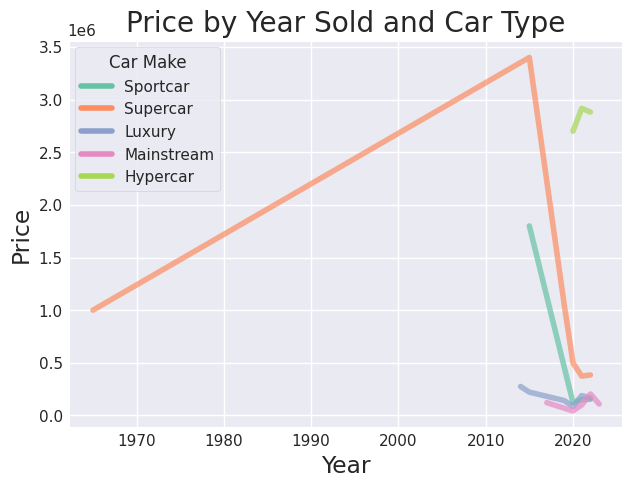

In [212]:
sns.set_style("darkgrid")
sns.set_palette("Set2")

sns.lineplot(x='Year', y='Price (in USD)', hue='Car Make', data=df, ci=None, estimator='mean', alpha=0.7)

plt.title("Price by Year Sold and Car Type")
plt.xlabel("Year")
plt.ylabel("Price")

## **Data Preprocessing 2**

In [213]:
df.isnull().sum()

Car Make                   0
Year                       0
Engine Size (L)            0
Horsepower                 0
Torque (lb-ft)             0
0-60 MPH Time (seconds)    0
Price (in USD)             0
dtype: int64

In [214]:
df

,Car Make,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
0,Sportcar,2022,Large,379,331,4.0,101200
1,Supercar,2021,Large,630,443,28.0,274390
2,Supercar,2022,Large,661,561,3.0,333750
3,Sportcar,2022,Large,562,406,32.0,142700
4,Supercar,2021,Large,710,568,27.0,298000
...,...,...,...,...,...,...,...
1002,Hypercar,2022,Large,1280,1106,25.0,3000000
1003,Sportcar,2021,Electric,1972,1254,2.0,2000000
1004,Supercar,2021,Large,789,590,27.0,1000000
1005,Hypercar,2021,Large,764,738,3.0,2600000


## **Label Encoding for `Object` dtype**

In [215]:
# Loop over each column in the DataFrame where dtype is 'object'
for col in df.select_dtypes(include=['object']).columns:
    
    # Print the column name and the unique values
    print(f"{col}: {df[col].unique()}")

Car Make: ['Sportcar' 'Supercar' 'Luxury' 'Mainstream' 'Hypercar']
Engine Size (L): ['Large' 'Medium' 'Electric/Hybrid' 'Electric' '1.5 Hybrid' 'Small'
 'Unknown' '4.0 Hybrid']


In [216]:
from sklearn import preprocessing

# Loop over each column in the DataFrame where dtype is 'object'
for col in df.select_dtypes(include=['object']).columns:
    
    # Initialize a LabelEncoder object
    label_encoder = preprocessing.LabelEncoder()
    
    # Fit the encoder to the unique values in the column
    label_encoder.fit(df[col].unique())
    
    # Transform the column using the encoder
    df[col] = label_encoder.transform(df[col])
    
    # Print the column name and the unique encoded values
    print(f"{col}: {df[col].unique()}")

Car Make: [3 4 1 2 0]
Engine Size (L): [4 5 3 2 0 6 7 1]


## **Train/Test Split**

In [217]:
from sklearn.model_selection import train_test_split

X = df.drop('Price (in USD)', axis=1)
y = df['Price (in USD)']

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [218]:
X_train.shape, y_train.shape

((805, 6), (805,))

In [219]:
# calculate the interquartile range for each feature
q1 = np.percentile(X_train, 25, axis=0)
q3 = np.percentile(X_train, 75, axis=0)
iqr = q3 - q1

# identify outliers using the IQR method
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = np.logical_or(X_train < lower_bound, X_train > upper_bound)

# remove the outliers from the training set
X_train = X_train[~np.any(outliers, axis=1)]
y_train = y_train[~np.any(outliers, axis=1)]

In [220]:
X_train.shape, y_train.shape

((562, 6), (562,))

## **Heatmap Correlation**

<Axes: >

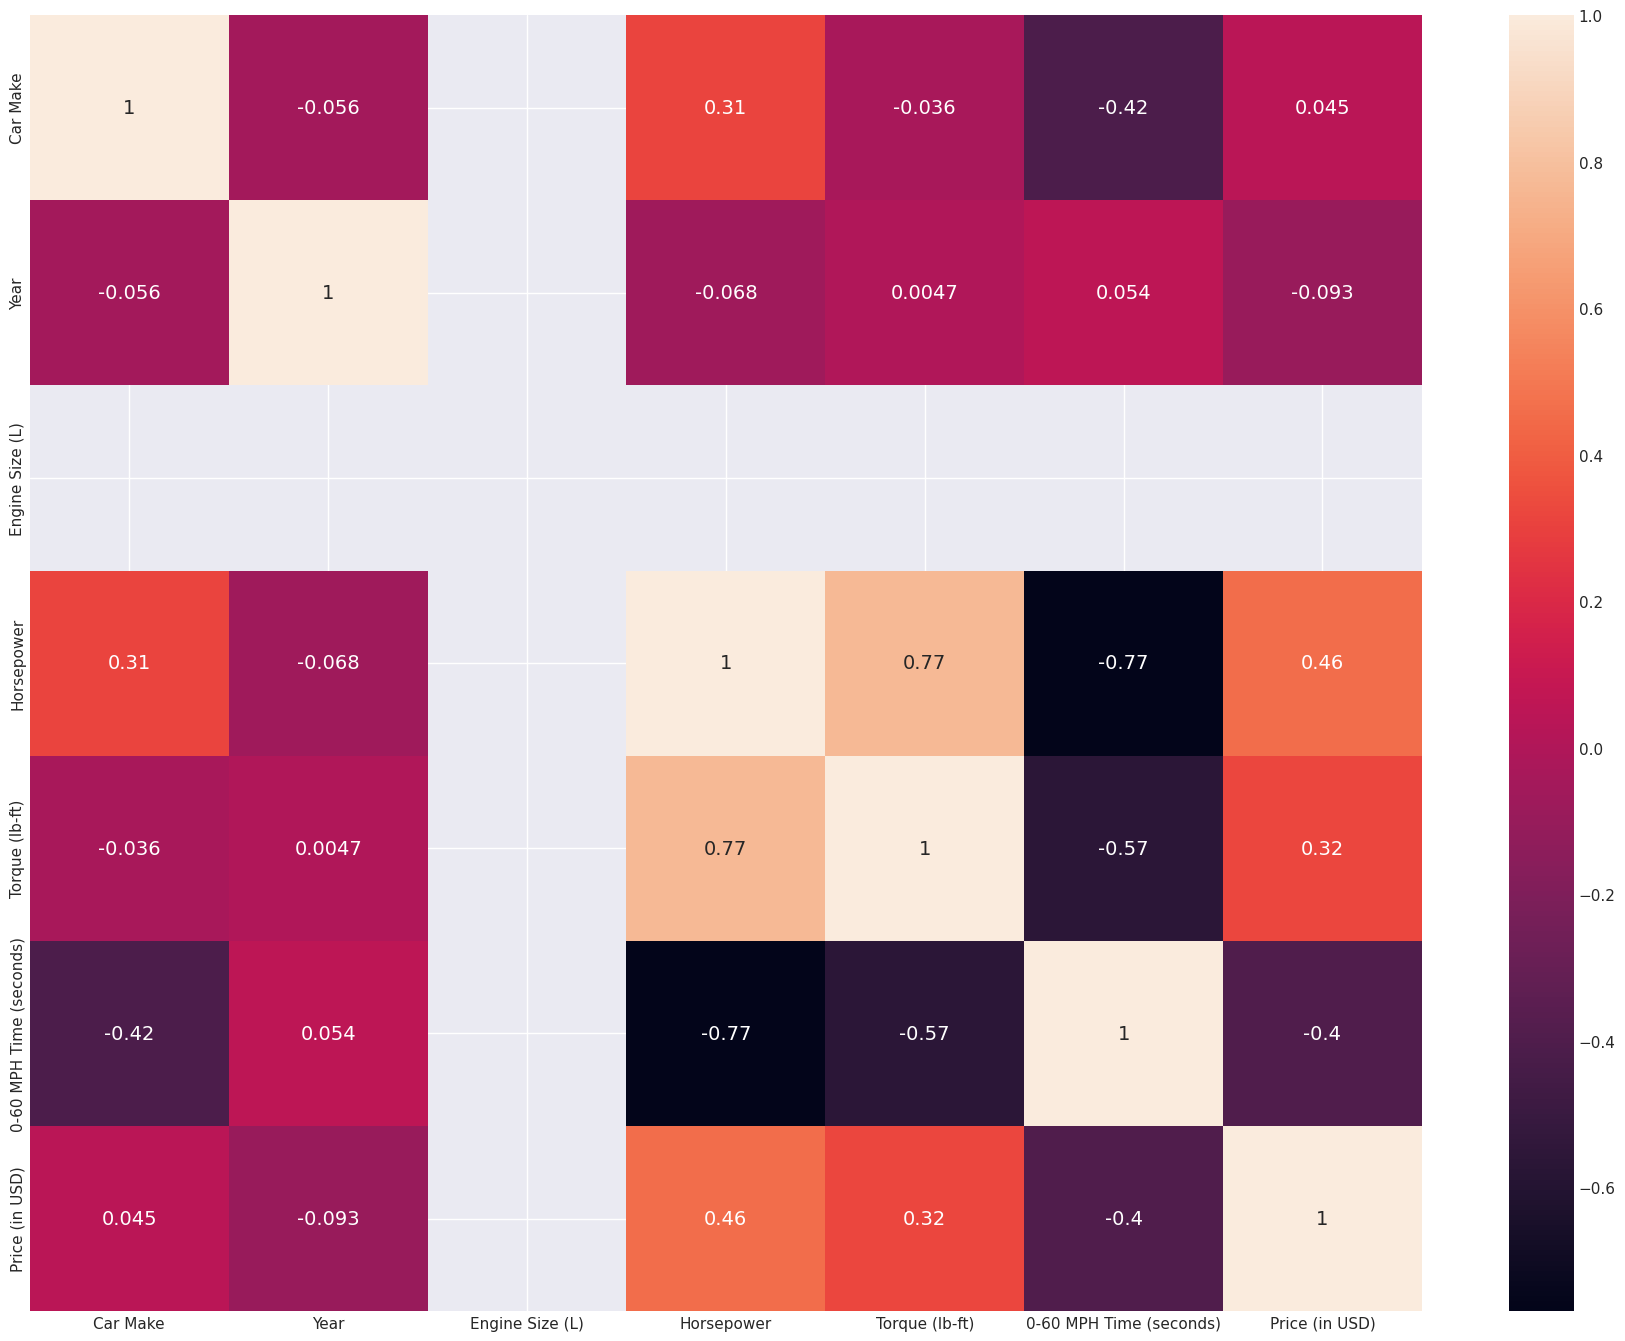

In [221]:
# concatenate X_train and y_train
train_data = pd.concat([X_train, y_train], axis=1)

#Correlation Heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(train_data.corr(), fmt='.2g', annot=True)

In [222]:
# Remove Engine Size (l) because it has no correlation
X_train = X_train.drop('Engine Size (L)', axis=1)
X_train.head()

,Car Make,Year,Horsepower,Torque (lb-ft),0-60 MPH Time (seconds)
767,3,2022,444,406,38.0
764,4,2021,612,561,34.0
529,1,2021,720,590,31.0
252,4,2021,592,457,28.0
451,1,2021,626,664,33.0


## **Decession Tree**

In [223]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

# Create a DecisionTreeRegressor object
dtree = DecisionTreeRegressor()

# Define the hyperparameters to tune and their values
param_grid = {
    'max_depth': [2, 4, 6, 8],
    'min_samples_split': [2, 4, 6, 8],
    'min_samples_leaf': [1, 2, 3, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'random_state':[0, 42]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(dtree, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

best_dtree = grid_search.best_estimator_
best_params = grid_search.best_params_

# Print the best hyperparameters
print("Best Hyperparameters:", best_params)
print("Best Estimator:", best_dtree)


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/di

Best Hyperparameters: {'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 8, 'random_state': 42}
Best Estimator: DecisionTreeRegressor(max_depth=8, max_features='sqrt', min_samples_split=8,
                      random_state=42)


In [261]:
dtree = DecisionTreeRegressor(max_depth= 8, max_features= 'sqrt', min_samples_leaf= 1, min_samples_split= 8, random_state= 42)

In [262]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_percentage_error
import math

# Fit the decision tree model
dtree.fit(X_train, y_train)

# Update X_test to include missing columns
X_test_updated = X_test.reindex(columns=X_train.columns)

# Make predictions on the updated test set
y_pred = dtree.predict(X_test_updated)

# Calculate evaluation metrics
mae = metrics.mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
rmse = math.sqrt(mse)

print('MAE is {}'.format(mae))
print('MAPE is {}'.format(mape))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))
print('RMSE score is {}'.format(rmse))

MAE is 215307.49046671862
MAPE is 0.6978517624862505
MSE is 338457808693.0676
R2 score is 0.4290174304316212
RMSE score is 581771.2683633213


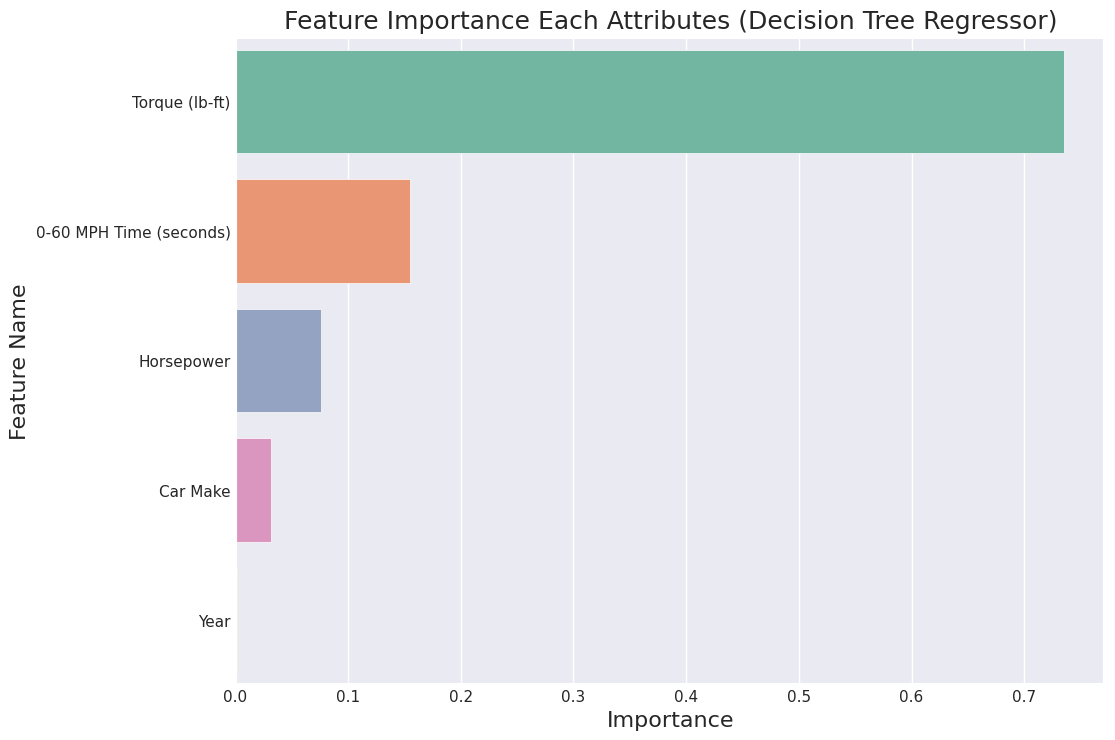

In [263]:
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": dtree.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Feature Importance Each Attributes (Decision Tree Regressor)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

## **Random Forest Regressor**

In [227]:
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regressor object
rf = RandomForestRegressor()

# Define the hyperparameter grid
param_grid = {
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt'],
    'random_state': [0, 42]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='r2')

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_
best_params = grid_search.best_params_

# Print the best hyperparameters
print("Best Hyperparameters:", best_params)
print("Best Estimator:", best_rf)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

Best Hyperparameters: {'max_depth': 7, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 0}
Best Estimator: RandomForestRegressor(max_depth=7, max_features='sqrt', random_state=0)


In [228]:
dtree = RandomForestRegressor(max_depth= 7, max_features= 'sqrt', min_samples_leaf= 1, min_samples_split= 2, random_state= 0)

In [253]:
# Fit the decision tree model
rf.fit(X_train, y_train)

# Update X_test to include missing columns
X_test_updated = X_test.reindex(columns=X_train.columns)

# Make predictions on the updated test set
y_pred = rf.predict(X_test_updated)

# Calculate evaluation metrics
mae = metrics.mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
rmse = math.sqrt(mse)

print('MAE is {}'.format(mae))
print('MAPE is {}'.format(mape))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))
print('RMSE score is {}'.format(rmse))

MAE is 122368.68871658458
MAPE is 0.4787752440349637
MSE is 115669162269.00993
R2 score is 0.8048646720629382
RMSE score is 340101.6940107913


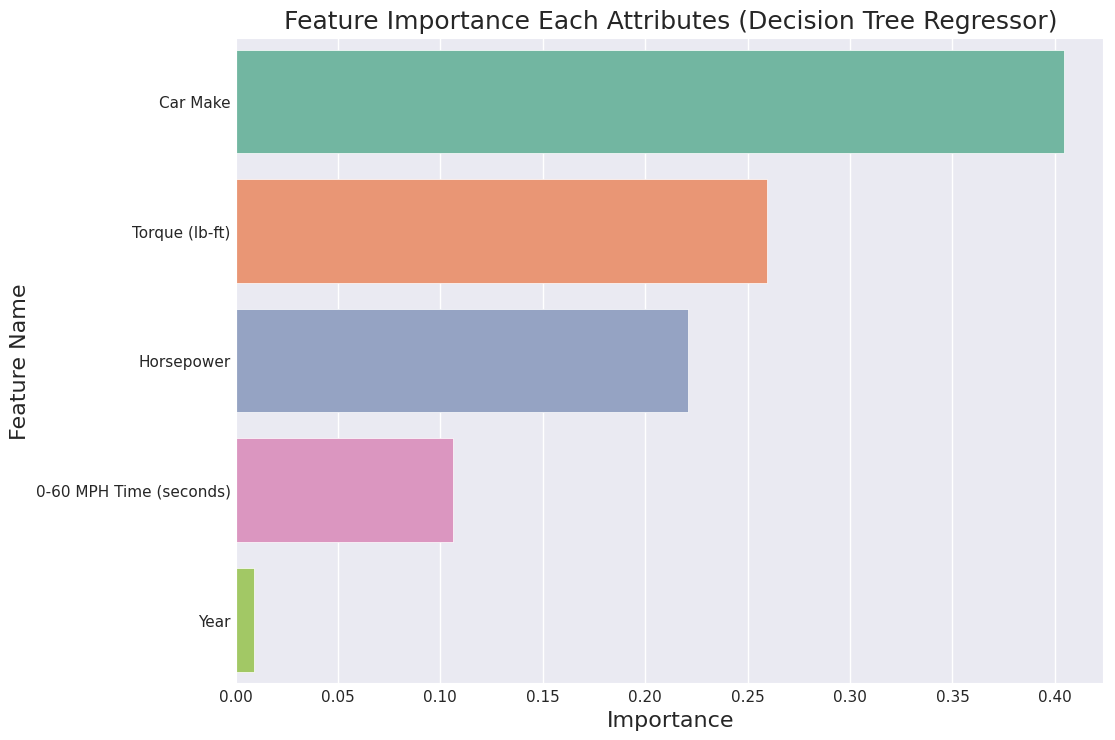

In [255]:
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": rf.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Feature Importance Each Attributes (Decision Tree Regressor)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

## **AdaBoost Regressor**

In [235]:
from sklearn.ensemble import AdaBoostRegressor

# Define AdaBoostRegressor model
abr = AdaBoostRegressor()

# Define hyperparameters and possible values
params = {'n_estimators': [50, 100, 150, 200],
          'learning_rate': [0.01, 0.1, 1, 10],
          'random_state': [0, 42]
         }

# Perform GridSearchCV with 5-fold cross validation
grid_search = GridSearchCV(abr, param_grid=params, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_abr = grid_search.best_estimator_
best_params = grid_search.best_params_

# Print the best hyperparameters
print("Best Hyperparameters:", best_params)
print("Best Estimator:", best_abr)

Best Hyperparameters: {'learning_rate': 0.1, 'n_estimators': 100, 'random_state': 42}
Best Estimator: AdaBoostRegressor(learning_rate=0.1, n_estimators=100, random_state=42)


In [236]:
abr = AdaBoostRegressor(learning_rate= 0.1, n_estimators= 100, random_state= 42)

In [237]:
# Fit the decision tree model
abr.fit(X_train, y_train)

# Update X_test to include missing columns
X_test_updated = X_test.reindex(columns=X_train.columns)

# Make predictions on the updated test set
y_pred = abr.predict(X_test_updated)

# Calculate evaluation metrics
mae = metrics.mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
rmse = math.sqrt(mse)

print('MAE is {}'.format(mae))
print('MAPE is {}'.format(mape))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))
print('RMSE score is {}'.format(rmse))

MAE is 199215.78644973508
MAPE is 0.8528836442495824
MSE is 258564694520.20087
R2 score is 0.5637981163829738
RMSE score is 508492.5707620524


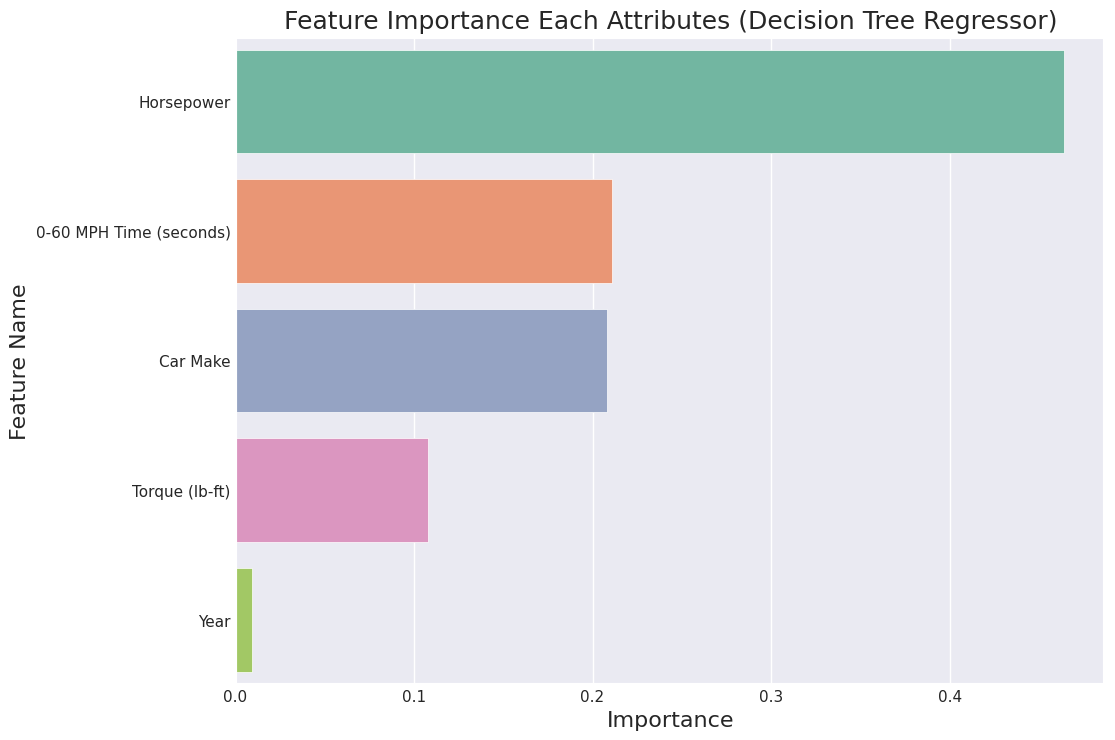

In [244]:
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": abr.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Feature Importance Each Attributes (Decision Tree Regressor)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

## **Neural Network Model**

In [240]:
from sklearn.neural_network import MLPRegressor

# Define MLPRegressor model
mlp = MLPRegressor()

# Define hyperparameters and possible values
params = {'hidden_layer_sizes': [(100,), (50, 50), (100, 50, 25)],
          'activation': ['relu', 'tanh'],
          'solver': ['adam', 'sgd'],
          'alpha': [0.0001, 0.001, 0.01],
          'random_state': [0, 42]
         }

# Perform GridSearchCV with 5-fold cross validation
grid_search = GridSearchCV(mlp, param_grid=params, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

# Print the best hyperparameters
print("Best Hyperparameters:", best_params)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

Best Hyperparameters: {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (100, 50, 25), 'random_state': 42, 'solver': 'adam'}


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [241]:
mlp = MLPRegressor(activation='relu', alpha=0.001, hidden_layer_sizes=(100, 50, 25), random_state=42, solver='adam')

In [242]:
# Fit the decision tree model
mlp.fit(X_train, y_train)

# Update X_test to include missing columns
X_test_updated = X_test.reindex(columns=X_train.columns)

# Make predictions on the updated test set
y_pred = abr.predict(X_test_updated)

# Calculate evaluation metrics
mae = metrics.mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
rmse = math.sqrt(mse)

print('MAE is {}'.format(mae))
print('MAPE is {}'.format(mape))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))
print('RMSE score is {}'.format(rmse))

MAE is 199215.78644973508
MAPE is 0.8528836442495824
MSE is 258564694520.20087
R2 score is 0.5637981163829738
RMSE score is 508492.5707620524


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [248]:
# Fit the MLPRegressor model
mlp.fit(X_train, y_train)

# Get the learned weights of the model
weights = mlp.coefs_[0]

# Calculate the importance scores based on the absolute values of the weights
importance_scores = np.abs(weights).sum(axis=0)

# Check if the lengths match
if len(X_train.columns) == len(importance_scores):
    # Create a DataFrame to store the feature names and their importance scores
    imp_df = pd.DataFrame({
        "Feature Name": X_train.columns,
        "Importance": importance_scores
    })

    # Sort the DataFrame by importance score in descending order
    fi = imp_df.sort_values(by="Importance", ascending=False)

    # Select the top 10 features with the highest importance scores
    fi2 = fi.head(10)

    # Plot the feature importance bar plot
    plt.figure(figsize=(10, 8))
    sns.barplot(data=fi2, x='Importance', y='Feature Name')
    plt.title('Feature Importance Each Attributes (MLPRegressor)', fontsize=18)
    plt.xlabel('Importance', fontsize=16)
    plt.ylabel('Feature Name', fontsize=16)
    plt.show()
else:
    print("Error: Lengths of feature names and importance scores do not match.")

Error: Lengths of feature names and importance scores do not match.


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


## **The accuracy from all of four algorithms are quite good. The best one is Random Forest Regression with 80% accuracy**